In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
biomarker_data = "Data/"

In [3]:
PD_DF = pd.read_csv(biomarker_data +"F_longcross.csv",low_memory=False)
PD_DF.head()

,Biomarker_project_type,PR_DATE,Biomarker_PI,Biomarker_institution,Biomarker_projectID,Biomarker_sampletype,TESTNAME,TESTVALUE,UNITS,RUNDATE,...,SCAU26CT,SCAU26DT,LDOPRTYP,LDOPRSPC,DCLPDO5Y,GBA_var,GBA_status,LRRK2_var,LRRK2_status,APOE
0,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,(4-Hydroxy-3-methoxyphenyl)ethanol,18197.20741,area,11/29/2018,...,Z,NaN,Z,6.0,1.0,NC,0.0,G2019S,1.0,E3/E3
1,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,(4-Hydroxy-3-methoxyphenyl)ethanol,0.0008928989999999998,area ratio,11/29/2018,...,Z,NaN,Z,6.0,1.0,NC,0.0,G2019S,1.0,E3/E3
2,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,1-Methylhistamine,31317.10022,area,11/29/2018,...,Z,NaN,Z,6.0,1.0,NC,0.0,G2019S,1.0,E3/E3
3,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,1-Methylhistamine,0.001670085,area ratio,11/29/2018,...,Z,NaN,Z,6.0,1.0,NC,0.0,G2019S,1.0,E3/E3
4,AJ_longitudinal,09/04/2015,Schwarzschild,Harvard,108,plasma,1-Methylhistidine,3234660.7810000004,area,11/29/2018,...,Z,NaN,Z,6.0,1.0,NC,0.0,G2019S,1.0,E3/E3


In [4]:
len(PD_DF)

2595172

In [5]:
PD_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595172 entries, 0 to 2595171
Data columns (total 54 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Biomarker_project_type  object 
 1   PR_DATE                 object 
 2   Biomarker_PI            object 
 3   Biomarker_institution   object 
 4   Biomarker_projectID     int64  
 5   Biomarker_sampletype    object 
 6   TESTNAME                object 
 7   TESTVALUE               object 
 8   UNITS                   object 
 9   RUNDATE                 object 
 10  lrrkid                  object 
 11  EVENT                   object 
 12  LRRK2_MUTATION          object 
 13  datasrc                 float64
 14  gender                  float64
 15  educcat_calc            float64
 16  racetxt                 object 
 17  ethnctxt                object 
 18  pdenrl                  float64
 19  agediag                 object 
 20  ageonset                object 
 21  demopd_ageassess        float64

In [6]:
PD_DF.isnull().sum()

Biomarker_project_type          0
PR_DATE                         0
Biomarker_PI                    0
Biomarker_institution           0
Biomarker_projectID             0
Biomarker_sampletype         2606
TESTNAME                      121
TESTVALUE                  561012
UNITS                         714
RUNDATE                   1655646
lrrkid                       2000
EVENT                        4496
LRRK2_MUTATION               4535
datasrc                    173171
gender                     173171
educcat_calc               201397
racetxt                    173171
ethnctxt                   174921
pdenrl                     173171
agediag                   1333319
ageonset                  1355893
demopd_ageassess           179037
pd_duration               1363621
pdmedyn                    396215
MCATOT                     254384
moca_ageassess             231497
updrs1                     173171
updrs2                     173171
updrs3                     173171
nupdrs1p_ageas

In [7]:
PD_DF = PD_DF.dropna(axis=1, how='all')

In [8]:
#PD_DF =PD_DF.dropna(subset = ["lrrkid","pdenrl",'updrs1','updrs2','updrs3'])
PD_DF =PD_DF.dropna(subset = ["pdenrl"])

In [9]:
PD_DF.isnull().sum()

Biomarker_project_type          0
PR_DATE                         0
Biomarker_PI                    0
Biomarker_institution           0
Biomarker_projectID             0
Biomarker_sampletype            0
TESTNAME                      121
TESTVALUE                  559804
UNITS                         358
RUNDATE                   1655646
lrrkid                          0
EVENT                           0
LRRK2_MUTATION                  5
datasrc                         0
gender                          0
educcat_calc                28226
racetxt                         0
ethnctxt                     1750
pdenrl                          0
agediag                   1160148
ageonset                  1182722
demopd_ageassess             5866
pd_duration               1190450
pdmedyn                    223044
MCATOT                      81213
moca_ageassess              58326
updrs1                          0
updrs2                          0
updrs3                          0
nupdrs1p_ageas

In [10]:
PD_DF['lrrkid'].nunique()

964

In [11]:
PD_DF['pdenrl'].value_counts()

pdenrl
1.0    1284921
0.0    1137080
Name: count, dtype: int64

In [12]:
df_gender = PD_DF.groupby(['gender','pdenrl'])

df_gender = df_gender.agg({'lrrkid':'nunique'})

df_gender.head()

lrrkid
gender pdenrl        
1.0    0.0        314
       1.0        204
2.0    0.0        210
       1.0        237

In [13]:
count_per_column = PD_DF.apply(lambda col: (col == "Z").sum())


print("\nNumber of occurrences of '{}' in each column:".format("Z"))
print(count_per_column)


Number of occurrences of 'Z' in each column:
Biomarker_project_type          0
PR_DATE                         0
Biomarker_PI                    0
Biomarker_institution           0
Biomarker_projectID             0
Biomarker_sampletype            0
TESTNAME                        0
TESTVALUE                       0
UNITS                           0
RUNDATE                         0
lrrkid                          0
EVENT                           0
LRRK2_MUTATION                  0
datasrc                         0
gender                          0
educcat_calc                    0
racetxt                         0
ethnctxt                   384287
pdenrl                          0
agediag                      4568
ageonset                     1985
demopd_ageassess                0
pd_duration                     0
pdmedyn                   2198957
MCATOT                          0
moca_ageassess                  0
updrs1                    2330634
updrs2                    2330634
up

In [14]:
columns_to_convert = ['demopd_ageassess','pd_duration','MCATOT']

PD_DF[columns_to_convert] = PD_DF[columns_to_convert].apply(pd.to_numeric)

In [15]:
pddfage = PD_DF[['agediag','ageonset']]

In [16]:
pddfage = pddfage[pddfage['ageonset'] != 'Z']
pddfage = pddfage[pddfage['agediag'] != 'Z']

In [17]:
columns_to_convert = ['agediag','ageonset']

pddfage[columns_to_convert] = pddfage[columns_to_convert].apply(pd.to_numeric)

<Axes: >

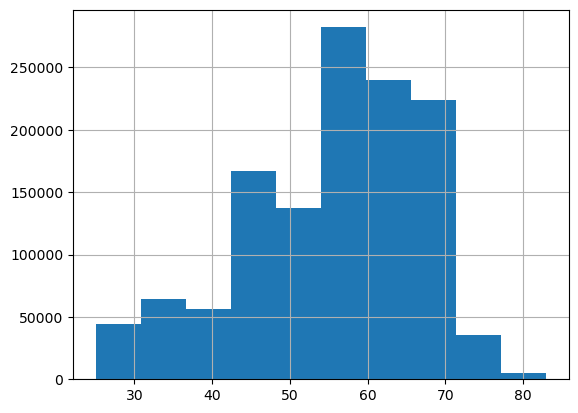

In [18]:
pddfage['agediag'].hist()

In [19]:
pddfage['agediag'].describe()

count    1.256703e+06
mean     5.551298e+01
std      1.149104e+01
min      2.500000e+01
25%      4.700000e+01
50%      5.600000e+01
75%      6.400000e+01
max      8.300000e+01
Name: agediag, dtype: float64

<Axes: ylabel='agediag'>

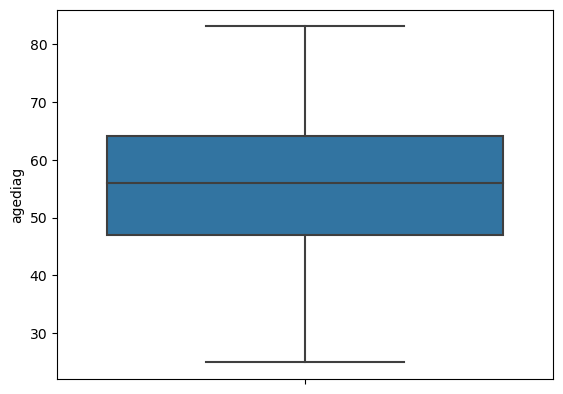

In [20]:
sns.boxplot(y = pddfage['agediag'])

<Axes: >

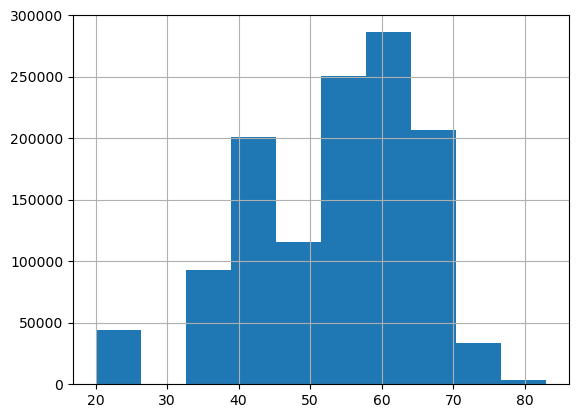

In [21]:
pddfage['ageonset'].hist()

In [22]:
pddfage['ageonset'].describe()

count    1.235593e+06
mean     5.365344e+01
std      1.210717e+01
min      2.000000e+01
25%      4.400000e+01
50%      5.500000e+01
75%      6.400000e+01
max      8.300000e+01
Name: ageonset, dtype: float64

<Axes: ylabel='ageonset'>

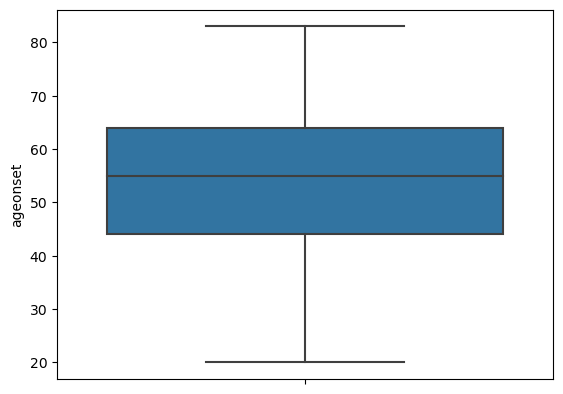

In [23]:
sns.boxplot(y = pddfage['ageonset'])

<Axes: >

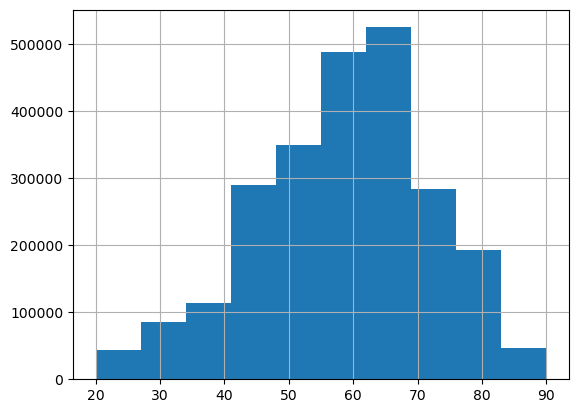

In [24]:
PD_DF['demopd_ageassess'].hist()

In [25]:
PD_DF['demopd_ageassess'].describe()

count    2.416135e+06
mean     5.819611e+01
std      1.360899e+01
min      2.000000e+01
25%      4.800000e+01
50%      5.900000e+01
75%      6.700000e+01
max      9.000000e+01
Name: demopd_ageassess, dtype: float64

<Axes: ylabel='demopd_ageassess'>

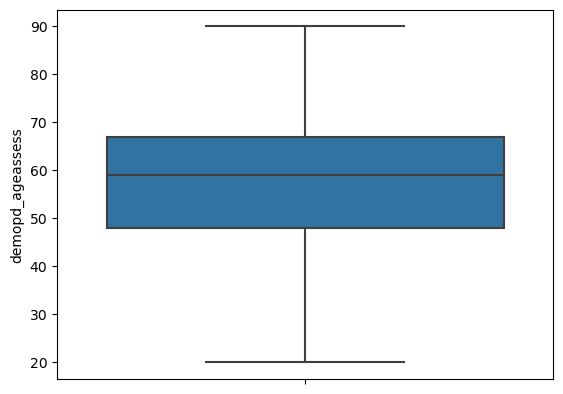

In [26]:
sns.boxplot(y = PD_DF['demopd_ageassess'])

PD_DF['pd_duration'].hist()

In [27]:
PD_DF['pd_duration'].describe()

count    1.231551e+06
mean     8.024010e+00
std      5.155542e+00
min     -2.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.100000e+01
max      3.300000e+01
Name: pd_duration, dtype: float64

sns.boxplot(y = PD_DF['pd_duration'])

PD_DF['MCATOT'].hist()

In [28]:
PD_DF['MCATOT'].describe()

count    2.340788e+06
mean     2.624418e+01
std      3.042796e+00
min      3.000000e+00
25%      2.500000e+01
50%      2.700000e+01
75%      2.800000e+01
max      3.000000e+01
Name: MCATOT, dtype: float64

<Axes: ylabel='MCATOT'>

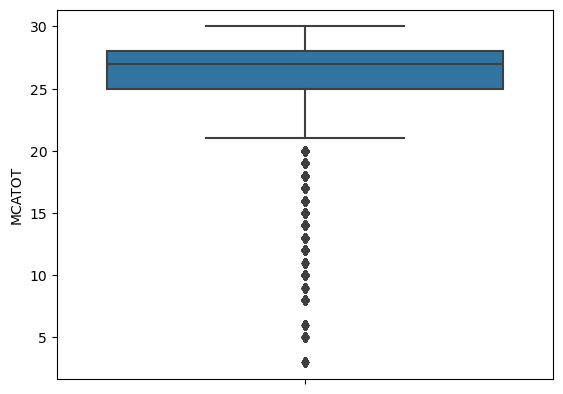

In [29]:
sns.boxplot(y = PD_DF['MCATOT'])

In [30]:
columns_to_drop = ['Biomarker_projectID','racetxt','educcat_calc','ageonset','PARKISM','agediag','demopd_ageassess',
                   'pd_duration','Biomarker_project_type', 'PR_DATE','Biomarker_PI','Biomarker_institution',
                   'EVENT','LRRK2_MUTATION','datasrc','GBA_var','LRRK2_var','updrs1','updrs2','updrs3',
                   'nupdrs1p_ageassess','nupdrs2p_ageassess','nupdrs3_ageassess','GBA_status','GBA_status',"ethnctxt",
                   "SCAU26DT",'LRRK2_status','moca_ageassess','pdmedyn',"UNITS","DCLPDO5Y"] 

In [31]:
PD_DF = PD_DF.drop(columns=columns_to_drop)

In [32]:
PD_DF.head()

,Biomarker_sampletype,TESTNAME,TESTVALUE,RUNDATE,lrrkid,gender,pdenrl,MCATOT,STROKE,HETRA,...,EPILEPSY,BRNINFM,CNSOTH,CNSOTHCM,SCAU26AT,SCAU26BT,SCAU26CT,LDOPRTYP,LDOPRSPC,APOE
0,plasma,(4-Hydroxy-3-methoxyphenyl)ethanol,18197.20741,11/29/2018,1420001,2.0,1.0,25.0,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,6.0,E3/E3
1,plasma,(4-Hydroxy-3-methoxyphenyl)ethanol,0.0008928989999999998,11/29/2018,1420001,2.0,1.0,25.0,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,6.0,E3/E3
2,plasma,1-Methylhistamine,31317.10022,11/29/2018,1420001,2.0,1.0,25.0,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,6.0,E3/E3
3,plasma,1-Methylhistamine,0.001670085,11/29/2018,1420001,2.0,1.0,25.0,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,6.0,E3/E3
4,plasma,1-Methylhistidine,3234660.7810000004,11/29/2018,1420001,2.0,1.0,25.0,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,6.0,E3/E3


In [33]:
len(PD_DF)

2422001

In [34]:
PD_DF['Biomarker_sampletype'].value_counts()

Biomarker_sampletype
csf                    2055241
serum                   267400
plasma                   79505
whole blood               6424
urine exosome             4992
urine                     3080
nucleic acids             2769
cerebrospinal fluid       1446
human urine               1144
Name: count, dtype: int64

In [35]:
PD_DF =PD_DF.dropna(subset = ["TESTNAME","TESTVALUE"])

In [36]:
PD_DF.isnull().sum()

Biomarker_sampletype          0
TESTNAME                      0
TESTVALUE                     0
RUNDATE                 1211631
lrrkid                        0
gender                        0
pdenrl                        0
MCATOT                    65738
STROKE                    62043
HETRA                     62043
RLS                       62111
NARCLPSY                  62043
DEPRS                     62043
EPILEPSY                  62043
BRNINFM                   62043
CNSOTH                    65380
CNSOTHCM                1565909
SCAU26AT                1509835
SCAU26BT                1515807
SCAU26CT                1412863
LDOPRTYP                 440442
LDOPRSPC                 687053
APOE                     992479
dtype: int64

In [37]:
count_per_column = PD_DF.apply(lambda col: (col == "Z").sum())


print("\nNumber of occurrences of '{}' in each column:".format("Z"))
print(count_per_column)


Number of occurrences of 'Z' in each column:
Biomarker_sampletype         0
TESTNAME                     0
TESTVALUE                    0
RUNDATE                      0
lrrkid                       0
gender                       0
pdenrl                       0
MCATOT                       0
STROKE                  290484
HETRA                   290484
RLS                     290484
NARCLPSY                290484
DEPRS                   290484
EPILEPSY                290484
BRNINFM                 290484
CNSOTH                  295052
CNSOTHCM                291698
SCAU26AT                290484
SCAU26BT                290484
SCAU26CT                290484
LDOPRTYP                290484
LDOPRSPC                     0
APOE                         0
dtype: int64


In [38]:
from datetime import datetime

def convert_to_desired_format(dt):
    try:
        parsed_dt = pd.to_datetime(dt)
        formatted_dt = parsed_dt.strftime('%Y-%m-%d %H:%M:%S')
        return formatted_dt
    except:
        return None  # Return None for invalid datetime values
    

    
PD_DF['RUNDATE'] = PD_DF['RUNDATE'].apply(convert_to_desired_format)

In [39]:
PD_DF['RUNDATE'] = pd.to_datetime(PD_DF['RUNDATE'])

# Find the date range
min_date = PD_DF['RUNDATE'].min()
max_date = PD_DF['RUNDATE'].max()

print("Minimum date:", min_date)
print("Maximum date:", max_date)

Minimum date: 2014-10-01 00:00:00
Maximum date: 2021-11-05 00:00:00


In [40]:
PD_DF.head()

,Biomarker_sampletype,TESTNAME,TESTVALUE,RUNDATE,lrrkid,gender,pdenrl,MCATOT,STROKE,HETRA,...,EPILEPSY,BRNINFM,CNSOTH,CNSOTHCM,SCAU26AT,SCAU26BT,SCAU26CT,LDOPRTYP,LDOPRSPC,APOE
0,plasma,(4-Hydroxy-3-methoxyphenyl)ethanol,18197.20741,2018-11-29,1420001,2.0,1.0,25.0,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,6.0,E3/E3
1,plasma,(4-Hydroxy-3-methoxyphenyl)ethanol,0.0008928989999999998,2018-11-29,1420001,2.0,1.0,25.0,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,6.0,E3/E3
2,plasma,1-Methylhistamine,31317.10022,2018-11-29,1420001,2.0,1.0,25.0,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,6.0,E3/E3
3,plasma,1-Methylhistamine,0.001670085,2018-11-29,1420001,2.0,1.0,25.0,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,6.0,E3/E3
4,plasma,1-Methylhistidine,3234660.7810000004,2018-11-29,1420001,2.0,1.0,25.0,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,6.0,E3/E3


In [41]:
# Check if there are any string values in 'TESTVALUE'
string_values = PD_DF['TESTVALUE'].apply(lambda x: isinstance(x, str)).any()

if string_values:
    print("TESTVALUE contains string values.")
else:
    print("TESTVALUE does not contain string values.")

TESTVALUE contains string values.


In [42]:
len(PD_DF)

1862197

In [43]:
pddf = PD_DF.drop(["Biomarker_sampletype","TESTNAME","TESTVALUE",'CNSOTHCM',"APOE","SCAU26AT","SCAU26BT","SCAU26CT","LDOPRTYP","LDOPRSPC"],axis=1)

In [44]:
pddf.head()

,RUNDATE,lrrkid,gender,pdenrl,MCATOT,STROKE,HETRA,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM,CNSOTH
0,2018-11-29,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,Z,Z
1,2018-11-29,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,Z,Z
2,2018-11-29,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,Z,Z
3,2018-11-29,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,Z,Z
4,2018-11-29,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,Z,Z


In [45]:

# Check for "Z" values in all columns
z_mask = pddf.applymap(lambda x: isinstance(x, str) and 'Z' in x)

# Create a mask for rows where "Z" is found in any column
row_mask = z_mask.any(axis=1)

pddf.drop(pddf[row_mask].index, inplace=True)

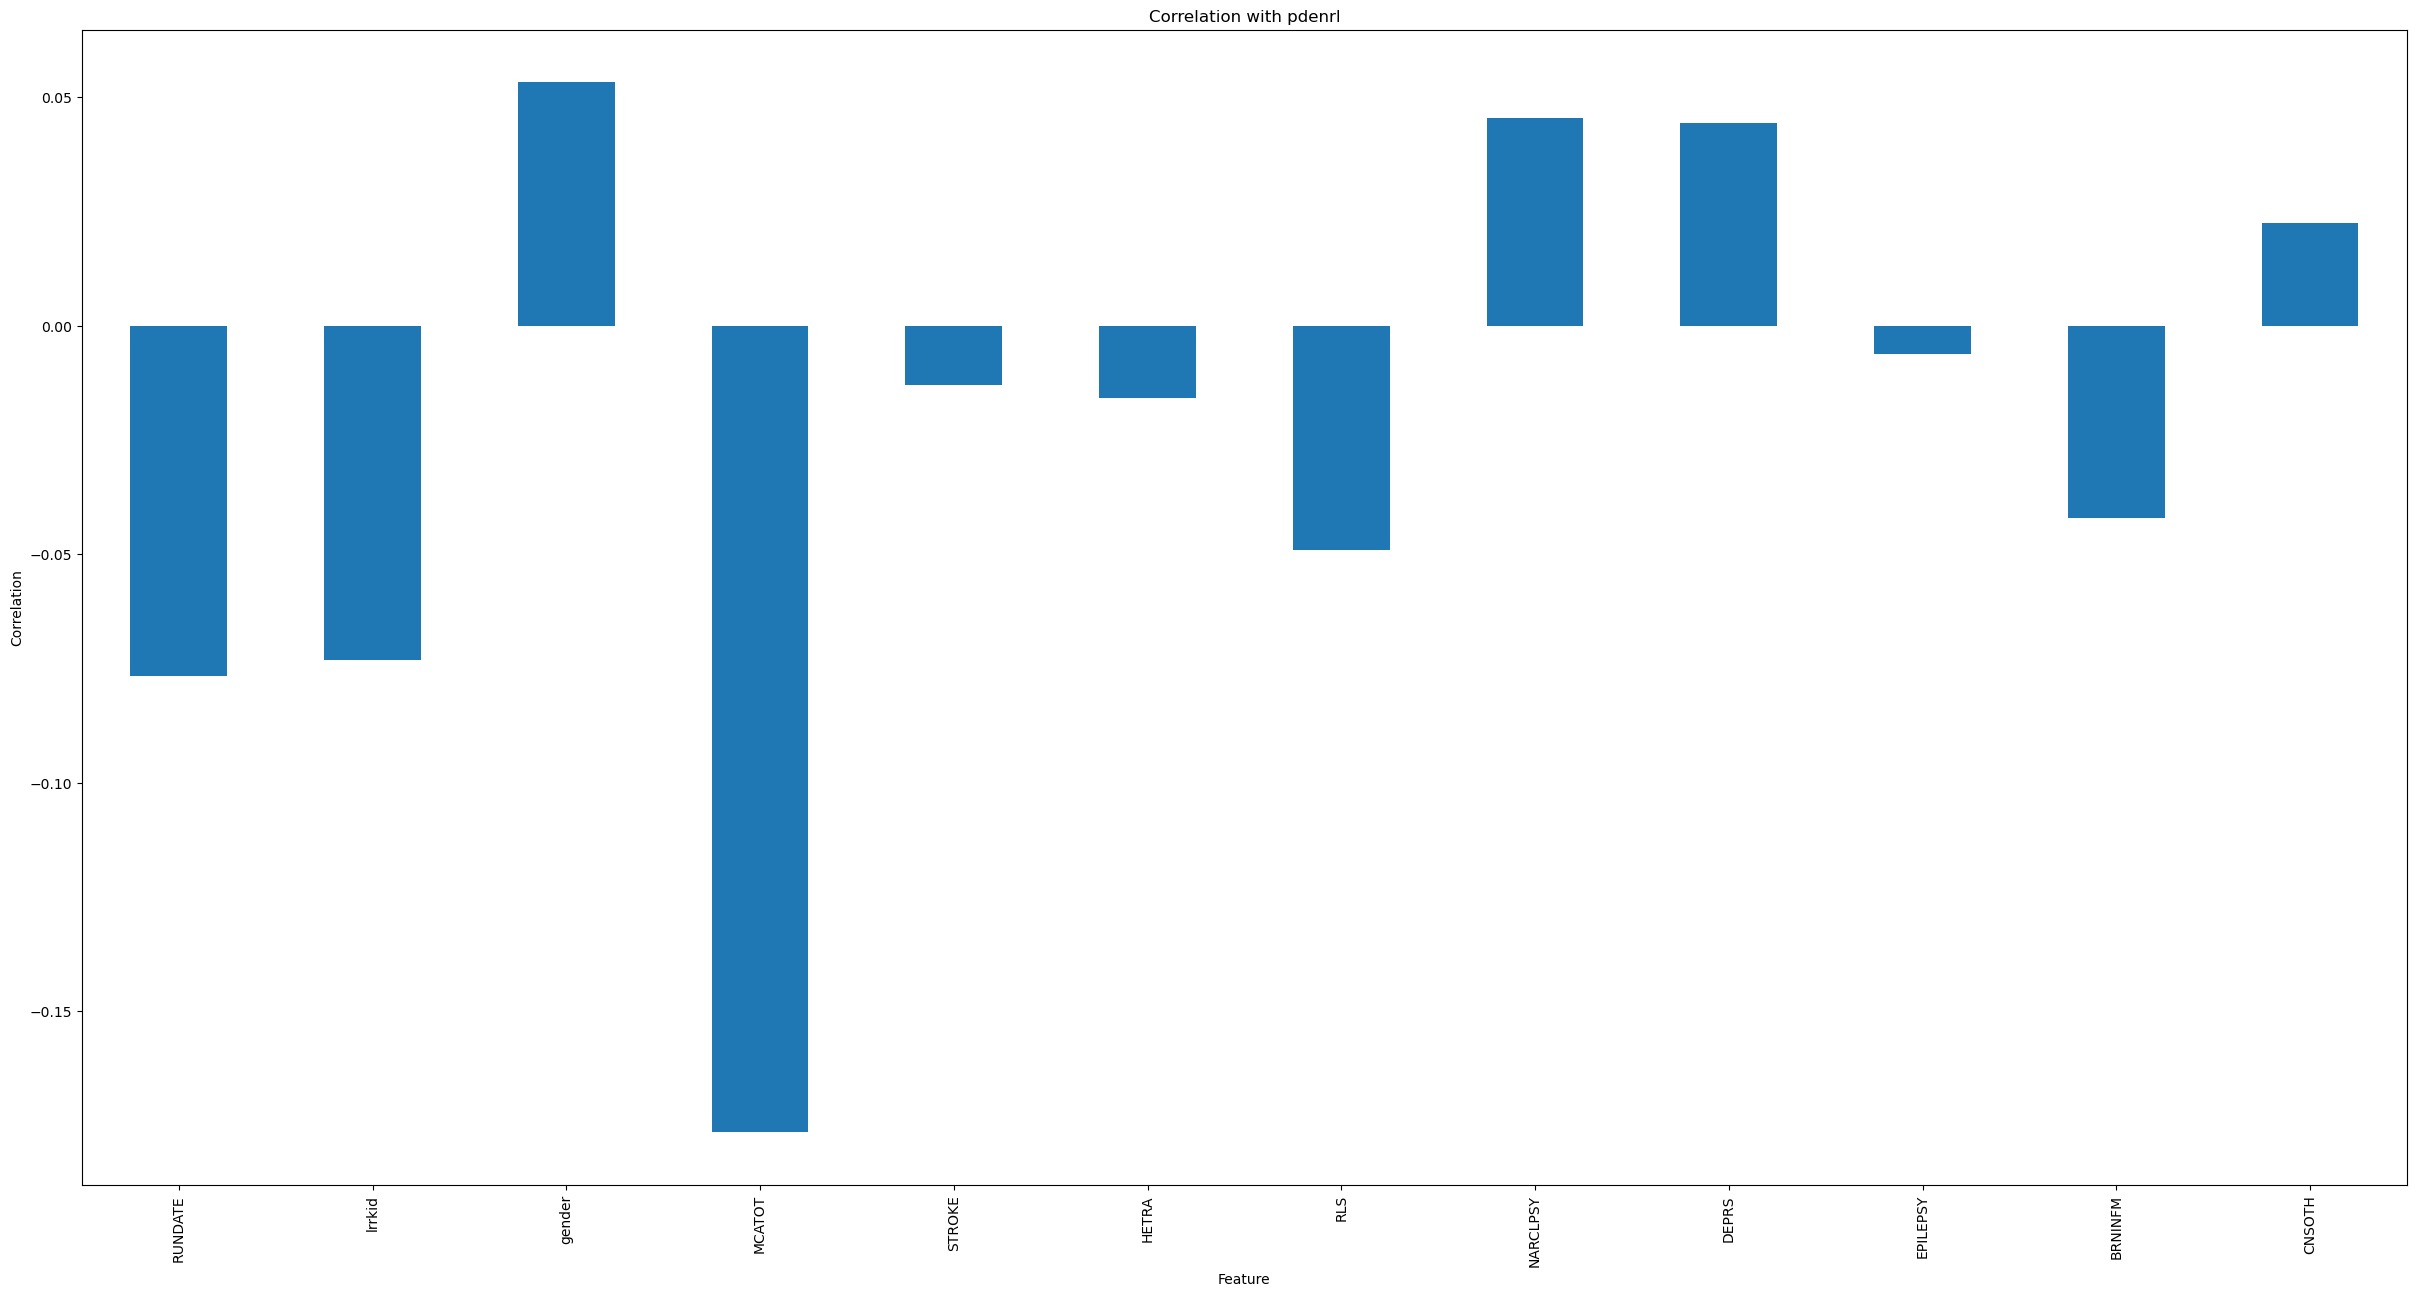

In [46]:
import matplotlib.pyplot as plt


correlation_matrix = pddf.corr()
target_correlation = correlation_matrix['pdenrl'].drop('pdenrl')

plt.figure(figsize=(30, 15))
target_correlation.plot(kind='bar')
plt.title('Correlation with pdenrl')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

In [47]:
non_numeric_values = PD_DF[~PD_DF['TESTVALUE'].apply(pd.to_numeric, errors='coerce').notna()]['TESTVALUE'].unique()
print(non_numeric_values)

['Not detected' '-' 'BQL' 'below quantitation level' 'OOR' 'OOR ' 'below'
 'above' '<LOW>' 'calibration - n/a' 'background too high for detection'
 'unknown - sample processing error' '< 8.66' '< 3.66' '< 0.8' '<1' '<1.2'
 '<3' '<1.5' '<0.8' '<9' '<5' '<0.6' '>12' '<0.2' '<2.8' '<0.5' '<2'
 '<2.5' '<0.57“' '407,contaminated' '161, contaminated' 'O1' 'H' 'F' 'G'
 'E' 'C' 'D' 'A' 'B' 'O2' 'O3' 'n.a.' 'u.d.l.' 'n.v.' 'N.A' 'n.p.' 'MS2'
 'outofrange' 'analysis problem' 'BLQ' '∞']


In [48]:
PD_DF['TESTVALUE'] = pd.to_numeric(PD_DF['TESTVALUE'], errors='coerce')

In [49]:
pivot_df = PD_DF.pivot_table(index=['lrrkid', 'RUNDATE'], columns=['Biomarker_sampletype', 'TESTNAME'], values='TESTVALUE')
pivot_df.columns = [f'{col[0]}_{col[1]}' for col in pivot_df.columns]
pivot_df.reset_index(inplace=True)


In [50]:
#PD_DF = PD_DF.merge(pivot_df, on=['lrrkid', 'RUNDATE'], how='inner')

PD_DF = PD_DF.merge(pivot_df, on=['lrrkid', 'RUNDATE']).drop_duplicates(subset=['lrrkid', 'RUNDATE'])

In [51]:
PD_DF = PD_DF.drop(["Biomarker_sampletype","TESTNAME","TESTVALUE","RUNDATE"],axis=1)

In [52]:
PD_DF.head()

,lrrkid,gender,pdenrl,MCATOT,STROKE,HETRA,RLS,NARCLPSY,DEPRS,EPILEPSY,...,whole blood_GluCer (d18:1/24:0),whole blood_GluCer (d18:1/24:1),whole blood_Glucosylcholesterol,whole blood_Glucosylsphingosine,whole blood_pS935_conc,whole blood_pS935_raw,whole blood_tLRRK2_conc,whole blood_tLRRK2_raw,whole blood_total di-18:1-BMP,whole blood_total di-22:6-BMP
0,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
PD_DF = PD_DF.dropna(axis=1, how='all')

In [54]:
len(PD_DF)

9729

In [55]:
PD_DF.head()

,lrrkid,gender,pdenrl,MCATOT,STROKE,HETRA,RLS,NARCLPSY,DEPRS,EPILEPSY,...,whole blood_GluCer (d18:1/24:0),whole blood_GluCer (d18:1/24:1),whole blood_Glucosylcholesterol,whole blood_Glucosylsphingosine,whole blood_pS935_conc,whole blood_pS935_raw,whole blood_tLRRK2_conc,whole blood_tLRRK2_raw,whole blood_total di-18:1-BMP,whole blood_total di-22:6-BMP
0,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
PD_DF.isnull().sum()

lrrkid                              0
gender                              0
pdenrl                              0
MCATOT                            312
STROKE                            163
                                 ... 
whole blood_pS935_raw            8909
whole blood_tLRRK2_conc          8909
whole blood_tLRRK2_raw           8909
whole blood_total di-18:1-BMP    9621
whole blood_total di-22:6-BMP    9621
Length: 3992, dtype: int64

In [57]:
PD_DF['CNSOTHCM'].value_counts()

CNSOTHCM
Z                                                                                                             2647
Hypertension                                                                                                    19
anxiety                                                                                                         17
migraine                                                                                                        12
BRAIN TUMOR                                                                                                     10
cerebral tumour (glioblastoma grade IV), secondary focal epilepsy                                                9
Peripheral neuropathy                                                                                            9
MIGRAINE                                                                                                         9
ANXIETY ATTACKS                                                        

In [58]:
# generate binary values using get_dummies
dumc_df = pd.get_dummies(PD_DF, columns=["CNSOTHCM"],prefix = "" )

# merge with main df bridge_df on key values
PD_DF = PD_DF.merge(dumc_df, how='left')

In [59]:
PD_DF = PD_DF.drop(["CNSOTHCM"], axis=1)

In [60]:
PD_DF = PD_DF.drop(["_Z"], axis=1)

In [61]:
PD_DF.head()

,lrrkid,gender,pdenrl,MCATOT,STROKE,HETRA,RLS,NARCLPSY,DEPRS,EPILEPSY,...,_lyme disease,_meningioma,_meningitis,_meningitis in childhood,_migraine,_multiple sclerosis,_nonREM parasonmnia (sleep walking),_optic neuritis,_possible Sleep apnea-hypopnea?,"_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed"
0,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,False,False,False,False,False,False,False,False,False,False
1,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,False,False,False,False,False,False,False,False,False,False
2,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,False,False,False,False,False,False,False,False,False,False
3,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,False,False,False,False,False,False,False,False,False,False
4,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,False,False,False,False,False,False,False,False,False,False


In [62]:
PD_DF['APOE'].value_counts()

APOE
E3/E3    3349
E3/E4    1154
E2/E3     750
E4/E4      42
E2/E4      35
E2/E2      27
Name: count, dtype: int64

In [63]:
# generate binary values using get_dummies
duma_df = pd.get_dummies(PD_DF, columns=["APOE"] )

# merge with main df bridge_df on key values
PD_DF = PD_DF.merge(duma_df, how='left')

In [64]:
PD_DF = PD_DF.drop(["APOE"], axis=1)

In [65]:
PD_DF.head()

,lrrkid,gender,pdenrl,MCATOT,STROKE,HETRA,RLS,NARCLPSY,DEPRS,EPILEPSY,...,_nonREM parasonmnia (sleep walking),_optic neuritis,_possible Sleep apnea-hypopnea?,"_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed",APOE_E2/E2,APOE_E2/E3,APOE_E2/E4,APOE_E3/E3,APOE_E3/E4,APOE_E4/E4
0,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,False,False,False,False,False,False,False,True,False,False
1,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,False,False,False,False,False,False,False,True,False,False
2,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,False,False,False,False,False,False,False,True,False,False
3,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,False,False,False,False,False,False,False,True,False,False
4,1420001,2.0,1.0,25.0,Z,Z,Z,Z,Z,Z,...,False,False,False,False,False,False,False,True,False,False


In [66]:
len(PD_DF)

9729

In [67]:
PD_DF['SCAU26AT'].value_counts()

SCAU26AT
Z                                  2523
Movicol                              87
Domperidone                          40
miralax                              19
metamucil                            15
NONE                                 10
SMOOTH MOVE TEA                      10
0                                    10
supps                                 8
fiber supplement tablet               8
suppository                           7
STOOL SOFTENER                        6
DOMPERIDONE                           6
ESTROGEN ACNE MED                     6
colace, miralax                       5
ducolax, senecot                      5
phyllips tablets                      5
lactulose                             5
linum seeds                           5
COLACE                                5
Movicol, if necessary                 5
Duspatal                              4
laxative daily                        3
DUCALAX                               3
laxaday                        

In [68]:
PD_DF['SCAU26BT'].value_counts()

SCAU26BT
Z                                                      2523
fesoterodine                                             39
duodart (5-alphareductase inhibitor & alpha inhib.)      38
antibiotics: urinary tract infection                     36
furosemide                                               32
FINASTERIDE                                              29
flomax                                                   25
Tamsulosin                                               18
tamsulosine                                              15
0                                                        13
TOVIAZ                                                   10
flomax, avadart                                           9
SOLIFENACINE, SERENOA                                     9
tamsulosin                                                8
detrol                                                    8
stress incon                                              8
tolterodine tartrate           

In [69]:
PD_DF['SCAU26CT'].value_counts()

SCAU26CT
Z                            2523
Selo-Zok                       62
enalapril                      47
atenolol                       47
Hydrochlorthiazid              47
                             ... 
metoprolol & "can't read"       2
amloipine                       2
atcaolol                        2
Hidrosauretil                   2
Captocomp                       2
Name: count, Length: 74, dtype: int64

In [70]:
count_per_column = PD_DF.apply(lambda col: (col == "Z").sum())

#print("Column Names:")
#print(PD_DF.columns)
print("\nNumber of occurrences of '{}' in each column:".format("Z"))
print(count_per_column)


Number of occurrences of 'Z' in each column:
lrrkid           0
gender           0
pdenrl           0
MCATOT           0
STROKE        2523
              ... 
APOE_E2/E3       0
APOE_E2/E4       0
APOE_E3/E3       0
APOE_E3/E4       0
APOE_E4/E4       0
Length: 4023, dtype: int64


In [71]:

# Check for "Z" values in all columns
z_mask = PD_DF.applymap(lambda x: isinstance(x, str) and 'Z' in x)

# Create a mask for rows where "Z" is found in any column
row_mask = z_mask.any(axis=1)

# Remove rows containing "Z" values in any column
PD_DF = PD_DF[~row_mask]

# If you want to remove rows in-place without creating a new DataFrame, you can use the following:
# PD_DF.drop(PD_DF[row_mask].index, inplace=True)


In [72]:
len(PD_DF)

6620

In [73]:
count_per_column = PD_DF.apply(lambda col: (col == "Z").sum())

#print("Column Names:")
#print(PD_DF.columns)
print("\nNumber of occurrences of '{}' in each column:".format("Z"))
print(count_per_column)


Number of occurrences of 'Z' in each column:
lrrkid        0
gender        0
pdenrl        0
MCATOT        0
STROKE        0
             ..
APOE_E2/E3    0
APOE_E2/E4    0
APOE_E3/E3    0
APOE_E3/E4    0
APOE_E4/E4    0
Length: 4023, dtype: int64


In [74]:
len(PD_DF)

6620

In [75]:

columns_to_convert = ["SCAU26AT", "SCAU26BT", "SCAU26CT", "LDOPRTYP", "LDOPRSPC"]

PD_DF[columns_to_convert] = PD_DF[columns_to_convert].applymap(lambda x: 1 if isinstance(x, str) else None)

In [76]:
# the columns to convert to numeric

columns_to_convert = ['STROKE','HETRA','RLS','NARCLPSY','DEPRS','EPILEPSY',"CNSOTH","BRNINFM","SCAU26AT", "SCAU26BT", "SCAU26CT", "LDOPRTYP", "LDOPRSPC"]

PD_DF[columns_to_convert] = PD_DF[columns_to_convert].apply(pd.to_numeric)

In [77]:
PD_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6620 entries, 1774 to 9728
Columns: 4023 entries, lrrkid to APOE_E4/E4
dtypes: bool(33), float64(3989), object(1)
memory usage: 201.8+ MB


In [78]:
len(PD_DF)

6620

In [79]:
df_gender = PD_DF.groupby(['gender','pdenrl'])

df_gender = df_gender.agg({'lrrkid':'nunique'})

df_gender.head()

lrrkid
gender pdenrl        
1.0    0.0        194
       1.0         95
2.0    0.0        120
       1.0        102

In [80]:
PD_DF['lrrkid'].nunique()

511

In [81]:
PD_DF['pdenrl'].value_counts()

pdenrl
0.0    3697
1.0    2923
Name: count, dtype: int64

In [82]:
PD_DF['MCATOT'].describe()

count    6442.000000
mean       25.971282
std         3.506015
min         5.000000
25%        24.000000
50%        27.000000
75%        28.000000
max        30.000000
Name: MCATOT, dtype: float64

In [83]:
PD_DF['MCATOT'].isnull().sum()

178

In [84]:
PD_DF['MCATOT'].value_counts()

MCATOT
28.0    1144
27.0     847
30.0     813
26.0     755
29.0     653
24.0     540
25.0     450
22.0     320
23.0     307
21.0     216
18.0      86
19.0      83
20.0      61
12.0      47
17.0      38
14.0      32
13.0      20
15.0      15
9.0        6
8.0        5
5.0        4
Name: count, dtype: int64

In [85]:
len(PD_DF)

6620

In [86]:
PD_DF.to_csv("Data/LRRK2_1212_.csv",index=False)

In [87]:
Final_df = PD_DF.dropna(axis=1, how='all')

In [88]:
Final_df = Final_df.drop(['gender'], axis=1)

In [89]:
Final_df.head()

,lrrkid,pdenrl,MCATOT,STROKE,HETRA,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM,...,_nonREM parasonmnia (sleep walking),_optic neuritis,_possible Sleep apnea-hypopnea?,"_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed",APOE_E2/E2,APOE_E2/E3,APOE_E2/E4,APOE_E3/E3,APOE_E3/E4,APOE_E4/E4
1774,30010,0.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
1775,70010,0.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1776,100010,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
1777,440010,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1778,490010,0.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [90]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6620 entries, 1774 to 9728
Columns: 2955 entries, lrrkid to APOE_E4/E4
dtypes: bool(33), float64(2921), object(1)
memory usage: 147.8+ MB


In [91]:
len(Final_df)

6620

In [92]:
Final_df['MCATOT'].isnull().sum()

178

In [93]:
Final_df['MCATOT'].describe()

count    6442.000000
mean       25.971282
std         3.506015
min         5.000000
25%        24.000000
50%        27.000000
75%        28.000000
max        30.000000
Name: MCATOT, dtype: float64

In [94]:
Final_df['STROKE'].isnull().sum()

163

In [95]:
Final_df.head()

,lrrkid,pdenrl,MCATOT,STROKE,HETRA,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM,...,_nonREM parasonmnia (sleep walking),_optic neuritis,_possible Sleep apnea-hypopnea?,"_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed",APOE_E2/E2,APOE_E2/E3,APOE_E2/E4,APOE_E3/E3,APOE_E3/E4,APOE_E4/E4
1774,30010,0.0,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
1775,70010,0.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1776,100010,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,True,False,False
1777,440010,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1778,490010,0.0,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [96]:
Final_df.columns = Final_df.columns.astype(str)

In [97]:
Final_df['lrrkid'].nunique()

511

In [98]:
Final_df['lrrkid'].value_counts()

lrrkid
40007     47
440007    45
550007    45
420007    45
210007    44
          ..
260008     1
450008     1
410008     1
200008     1
320008     1
Name: count, Length: 511, dtype: int64

In [99]:
Final_df['pdenrl'].value_counts()

pdenrl
0.0    3697
1.0    2923
Name: count, dtype: int64

In [100]:
len(Final_df)

6620

In [159]:
# Unique patients id

patient_id = Final_df["lrrkid"].unique()

#randomly shuffle patient. 

np.random.shuffle(patient_id)

patient_id[:5]

array(['90004', '1300006', '820005', '20010', '300004'], dtype=object)

In [160]:
total_data = Final_df["lrrkid"].isin(patient_id[:round(0.75 * len(patient_id))])

train_data = Final_df.loc[total_data, :]
test_data = Final_df.loc[~total_data, :]

In [161]:
train_data['lrrkid'].isin(test_data['lrrkid']).value_counts()

lrrkid
False    4760
Name: count, dtype: int64

In [162]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1860 entries, 1778 to 9728
Columns: 2955 entries, lrrkid to APOE_E4/E4
dtypes: bool(33), float64(2921), object(1)
memory usage: 41.5+ MB


In [163]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4760 entries, 1774 to 9719
Columns: 2955 entries, lrrkid to APOE_E4/E4
dtypes: bool(33), float64(2921), object(1)
memory usage: 106.3+ MB


In [164]:
test_data['lrrkid'].nunique()

128

In [165]:
train_data['lrrkid'].nunique()

383

In [166]:
train_data["pdenrl"].value_counts()

pdenrl
0.0    2683
1.0    2077
Name: count, dtype: int64

In [167]:
test_data["pdenrl"].value_counts()

pdenrl
0.0    1014
1.0     846
Name: count, dtype: int64

In [168]:
train_X = train_data.drop(['lrrkid','pdenrl'], axis=1)

trainy = train_data['pdenrl']

trainy[0:5]

1774    0.0
1775    0.0
1776    0.0
1777    0.0
1781    0.0
Name: pdenrl, dtype: float64

In [169]:
train_X.head()

,MCATOT,STROKE,HETRA,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM,CNSOTH,SCAU26AT,...,_nonREM parasonmnia (sleep walking),_optic neuritis,_possible Sleep apnea-hypopnea?,"_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed",APOE_E2/E2,APOE_E2/E3,APOE_E2/E4,APOE_E3/E3,APOE_E3/E4,APOE_E4/E4
1774,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,False,False,False,False,False,False,False,True,False,False
1775,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,False,False,False,False,False,False,False,False,False,False
1776,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,False,False,False,False,False,False,False,True,False,False
1777,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,False,False,False,False,False,False,False,False,True,False
1781,29.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,False,False,False,False,False,False,False,True,False,False


In [170]:
test_X = test_data.drop(['lrrkid','pdenrl'], axis=1)

testY = test_data['pdenrl']

testY[0:5]

1778    0.0
1779    0.0
1780    0.0
1782    0.0
1788    0.0
Name: pdenrl, dtype: float64

In [171]:
test_X.head()

,MCATOT,STROKE,HETRA,RLS,NARCLPSY,DEPRS,EPILEPSY,BRNINFM,CNSOTH,SCAU26AT,...,_nonREM parasonmnia (sleep walking),_optic neuritis,_possible Sleep apnea-hypopnea?,"_they deny having RLS but suitable symptoms, not diagnosed of depression but scales suggest he is depressed",APOE_E2/E2,APOE_E2/E3,APOE_E2/E4,APOE_E3/E3,APOE_E3/E4,APOE_E4/E4
1778,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1779,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,False,False,False,False,False,False,False,True,False,False
1780,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,False,False,False,False,False,False,False,False,True,False
1782,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,False,False,False,False,False,False,False,False,False,False
1788,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,False,False,False,False,False,False,False,False,False,False


In [172]:
print("Shape of Xtest: %d   %d" % (test_X.shape))
print("Shape of yest:  %d" % (testY.shape))

print("Shape of trainx: %d   %d" % (train_X.shape))
print("Shape of trainY:  %d" % (trainy.shape))

Shape of Xtest: 1860   2953
Shape of yest:  1860
Shape of trainx: 4760   2953
Shape of trainY:  4760


In [173]:
from sklearn import preprocessing
from sklearn import metrics

from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [174]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier( )

#dt_clf = dt_clf.fit(trainX,trainy)

In [175]:

ccp_alphas = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1,0.2]
cv_scores = []

for alpha in ccp_alphas:
    dt_clf.set_params(ccp_alpha=alpha)
    scores = cross_val_score(dt_clf, train_X, trainy, cv=10)  
    cv_scores.append(scores.mean())

# Find the optimal ccp_alpha value
optimal_alpha = ccp_alphas[cv_scores.index(max(cv_scores))]
print("Optimal ccp_alpha value:", optimal_alpha)

Optimal ccp_alpha value: 0.02


In [176]:
import time
start = time.time() 


dt_clf.set_params(ccp_alpha=optimal_alpha)

dt_clf = dt_clf.fit(train_X,trainy)

stop = time.time()
print(f"Training time: {stop - start}s") 

Training time: 5.08521294593811s


In [177]:
root_node = dt_clf.tree_

# Access details of the root node
n_nodes = root_node.node_count
threshold = root_node.threshold
feature = root_node.feature

print("Root Node Details:")
print("Number of nodes:", n_nodes)
print("Threshold:", threshold)
print("Feature:", feature)

Root Node Details:
Number of nodes: 1297
Threshold: [24.5 16.  -2.  ... -2.  -2.  -2. ]
Feature: [ 0  0 -2 ... -2 -2 -2]


In [178]:
import graphviz
from sklearn.tree import export_graphviz

# Visualize the entire decision tree
dot_data = export_graphviz(dt_clf, out_file=None, 
                           feature_names=train_X.columns, 
                           class_names=['0', '1'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("Tes12_12_decision_tree-2")  

'Tes12_12_decision_tree-2.pdf'

[Text(0.5435824884068223, 0.9976415094339622, 'x[0] <= 24.5\ngini = 0.492\nsamples = 4760\nvalue = [2683, 2077]'),
 Text(0.37538316434803115, 0.9929245283018868, 'x[0] <= 16.0\ngini = 0.478\nsamples = 1371\nvalue = [543, 828]'),
 Text(0.36532264403049597, 0.9882075471698113, 'gini = 0.0\nsamples = 72\nvalue = [0, 72]'),
 Text(0.3854436846655663, 0.9882075471698113, 'x[0] <= 23.5\ngini = 0.487\nsamples = 1299\nvalue = [543, 756]'),
 Text(0.3439440383557337, 0.9834905660377359, 'x[2] <= 0.5\ngini = 0.497\nsamples = 805\nvalue = [374, 431]'),
 Text(0.33388351803819855, 0.9787735849056604, 'x[2915] <= 1633.0\ngini = 0.499\nsamples = 777\nvalue = [374, 403]'),
 Text(0.2810657863711389, 0.9740566037735849, 'x[2801] <= 29.815\ngini = 0.498\nsamples = 756\nvalue = [357, 399]'),
 Text(0.2710052660536037, 0.9693396226415094, 'x[2169] <= 2.46\ngini = 0.498\nsamples = 748\nvalue = [349, 399]'),
 Text(0.2609447457360685, 0.964622641509434, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.2810657

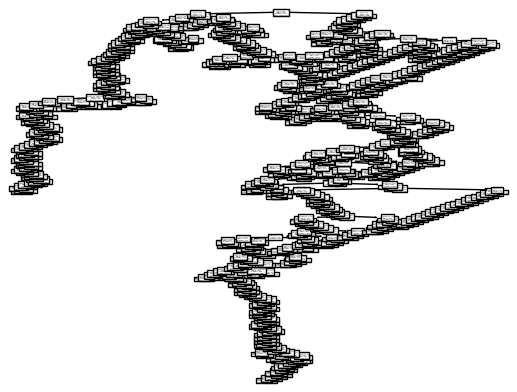

In [179]:
tree.plot_tree(dt_clf)

In [180]:
dt_score = dt_clf.score(train_X, trainy)
print("Train Score: ", dt_score)

Train Score:  0.8363445378151261


In [181]:
dt_cv_scores = cross_val_score(dt_clf, train_X, trainy, cv=10)
print("CV average score: %.2f" % dt_cv_scores.mean())

CV average score: 0.58


In [182]:
dt_accuracy_score = accuracy_score(testY,dt_clf.predict(test_X))*100
print("DT test accuracy_score:", dt_accuracy_score)

DT test accuracy_score: 58.44086021505376


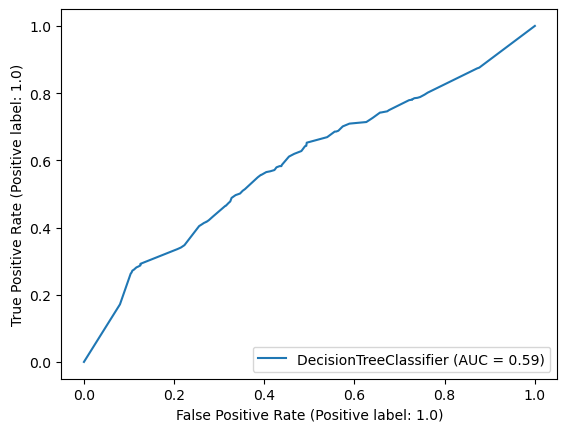

In [183]:
RocCurveDisplay.from_estimator(dt_clf,test_X,testY)

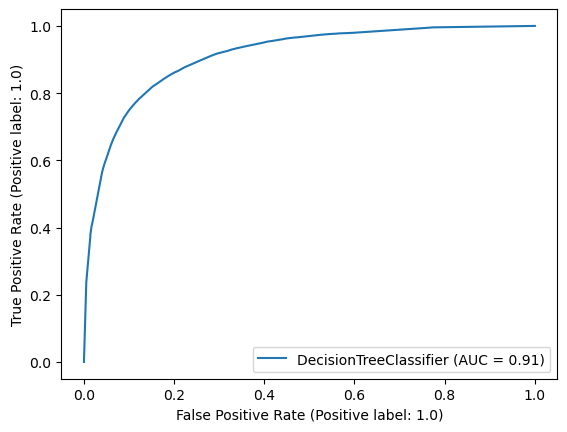

In [184]:
RocCurveDisplay.from_estimator(dt_clf,train_X, trainy)

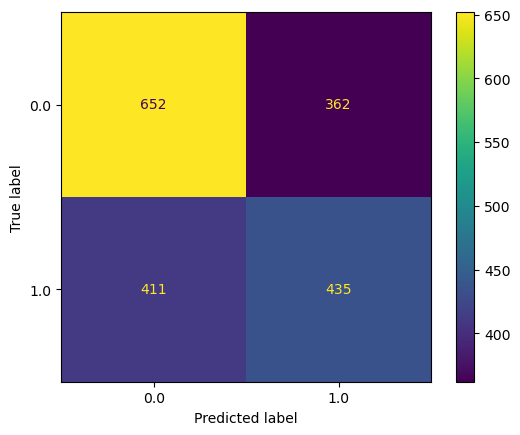

In [185]:
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_estimator(dt_clf, test_X, testY)  
plt.show() 

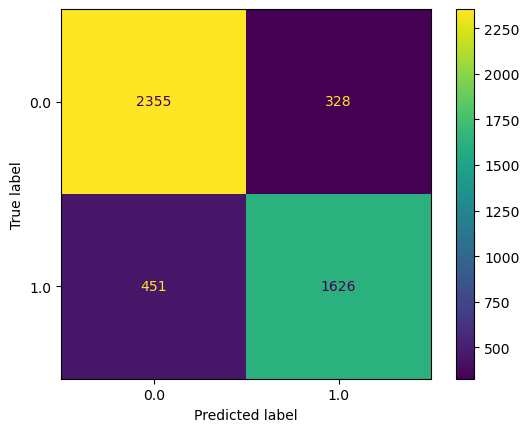

In [186]:
ConfusionMatrixDisplay.from_estimator(dt_clf, train_X, trainy)  
plt.show() 

In [187]:
dt_ypred = dt_clf.predict(test_X)

dtcm = confusion_matrix(testY, dt_ypred)
print(dtcm)

[[652 362]
 [411 435]]


In [188]:
dt_ypred1 = dt_clf.predict(train_X)

cm = confusion_matrix(trainy, dt_ypred1)
print(cm)

[[2355  328]
 [ 451 1626]]


In [189]:
s3 = mean_absolute_error(testY, dt_ypred)
s4 = mean_absolute_error(trainy, dt_ypred1)
print("MAE of DT on training set: {:.3f}".format(s3))
print("MAE of DT on test set: {:.3f}".format(s4))

MAE of DT on training set: 0.416
MAE of DT on test set: 0.164


In [190]:
print("confusion matrix\n",confusion_matrix(testY,dt_ypred))
print("\nclassification report\n",classification_report(testY,dt_ypred))
print("Accuracy: ",accuracy_score(testY,dt_ypred)*100)

confusion matrix
 [[652 362]
 [411 435]]

classification report
               precision    recall  f1-score   support

         0.0       0.61      0.64      0.63      1014
         1.0       0.55      0.51      0.53       846

    accuracy                           0.58      1860
   macro avg       0.58      0.58      0.58      1860
weighted avg       0.58      0.58      0.58      1860

Accuracy:  58.44086021505376


In [191]:
y_pred_test=dt_clf.predict(test_X)
msqe_test=mean_squared_error(testY, y_pred_test)  
var_test=np.var(testY) 
score_test=1-msqe_test/var_test


print('Coefficient of determination of test data:')
print(score_test)

Coefficient of determination of test data:
-0.6760390000979359


In [192]:
#CALCULATE THE COEFFICIENT OF DETERMINATION ON TRAIN DATA
y_pred_train=dt_clf.predict(train_X)
msqe_train=mean_squared_error(trainy, y_pred_train) 
var_train=np.var(trainy)
score_train=1-msqe_train/var_train

print('Coefficient of determination of train data:')
print(score_train)

Coefficient of determination of train data:
0.33459319013364786


In [193]:
from sklearn.ensemble import HistGradientBoostingClassifier as GBC

gb_clf = GBC()

In [194]:
gb_clf.fit(train_X, trainy)

HistGradientBoostingClassifier()

In [195]:
gb_score = gb_clf.score(train_X, trainy)
print("Train Score: ", gb_score)

Train Score:  0.9241596638655463


In [196]:
gb_cv_scores = cross_val_score(gb_clf, train_X, trainy, cv=10)
print("CV average score: %.2f" % gb_cv_scores.mean())

CV average score: 0.75


In [197]:
gb_accuracy_score = accuracy_score(testY,gb_clf.predict(test_X))*100
print("GB test accuracy_score:", gb_accuracy_score)

GB test accuracy_score: 63.2258064516129


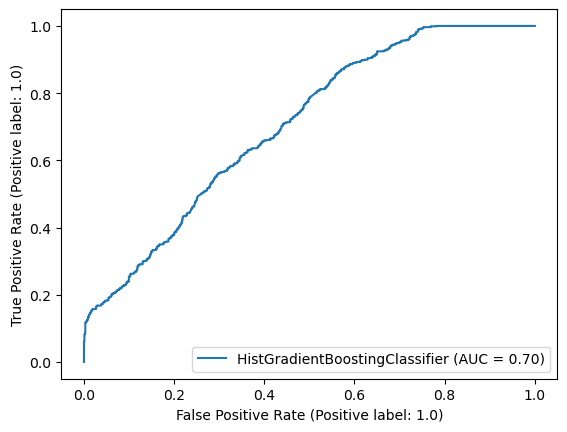

In [198]:
RocCurveDisplay.from_estimator(gb_clf,test_X,testY)

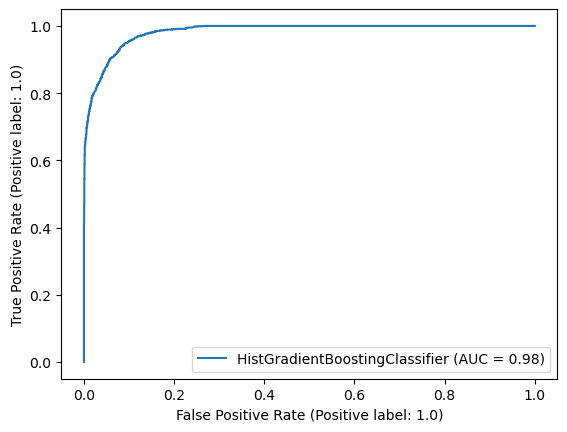

In [199]:
RocCurveDisplay.from_estimator(gb_clf,train_X, trainy)

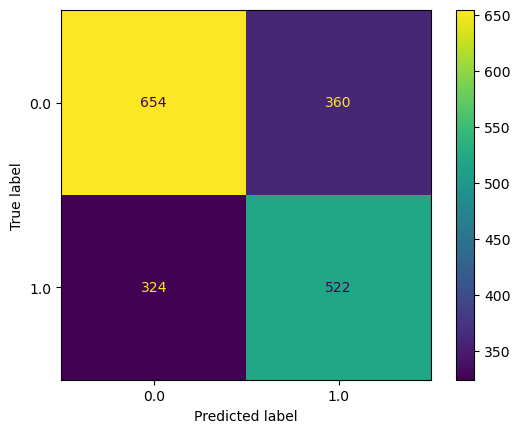

In [200]:
ConfusionMatrixDisplay.from_estimator(gb_clf, test_X, testY)  
plt.show() 

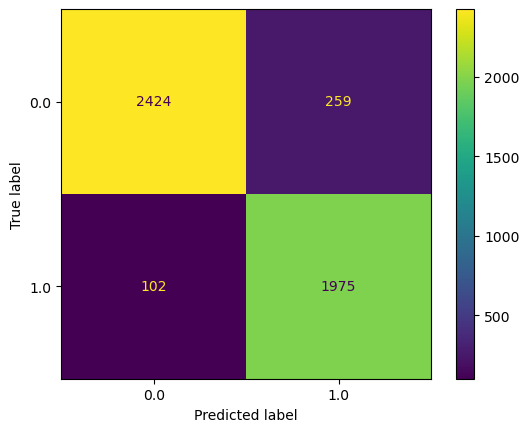

In [201]:
ConfusionMatrixDisplay.from_estimator(gb_clf, train_X, trainy)  
plt.show() 

In [202]:
gb_ypred = gb_clf.predict(test_X)

dtcm = confusion_matrix(testY, gb_ypred)
print(dtcm)

[[654 360]
 [324 522]]


In [203]:
print("confusion matrix\n",confusion_matrix(testY,gb_ypred))
print("\nclassification report\n",classification_report(testY,gb_ypred))
print("Accuracy: ",accuracy_score(testY,gb_ypred)*100)

confusion matrix
 [[654 360]
 [324 522]]

classification report
               precision    recall  f1-score   support

         0.0       0.67      0.64      0.66      1014
         1.0       0.59      0.62      0.60       846

    accuracy                           0.63      1860
   macro avg       0.63      0.63      0.63      1860
weighted avg       0.63      0.63      0.63      1860

Accuracy:  63.2258064516129


In [204]:
y_pred_test=gb_clf.predict(test_X)
msqe_test=mean_squared_error(testY, y_pred_test)  
var_test=np.var(testY) 
score_test=1-msqe_test/var_test


print('Coefficient of determination of test data:')
print(score_test)

Coefficient of determination of test data:
-0.483066851315638


In [205]:
#CALCULATE THE COEFFICIENT OF DETERMINATION ON TRAIN DATA
y_pred_train=gb_clf.predict(train_X)
msqe_train=mean_squared_error(trainy, y_pred_train) 
var_train=np.var(trainy)
score_train=1-msqe_train/var_train

print('Coefficient of determination of train data:')
print(score_train)

Coefficient of determination of train data:
0.6916407466473002


In [206]:
from sklearn.ensemble import BaggingClassifier as BC
Bag_clf = BC()

In [207]:
Bag_clf.fit(train_X, trainy)

BaggingClassifier()

In [208]:
bgb_score = Bag_clf.score(train_X, trainy)
print("Train Score: ", bgb_score)

Train Score:  0.9182773109243697


In [209]:
bgb_cv_scores = cross_val_score(Bag_clf, train_X, trainy, cv=10)
print("CV average score: %.2f" % bgb_cv_scores.mean())

CV average score: 0.59


In [210]:
bgb_accuracy_score = accuracy_score(testY,Bag_clf.predict(test_X))*100
print("GB test accuracy_score:", bgb_accuracy_score)

GB test accuracy_score: 57.15053763440861


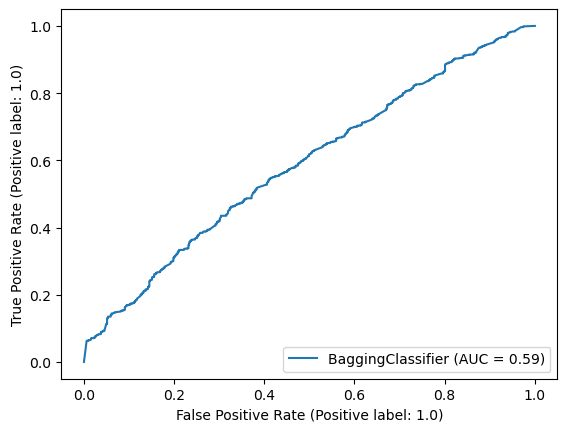

In [211]:
RocCurveDisplay.from_estimator(Bag_clf,test_X,testY)

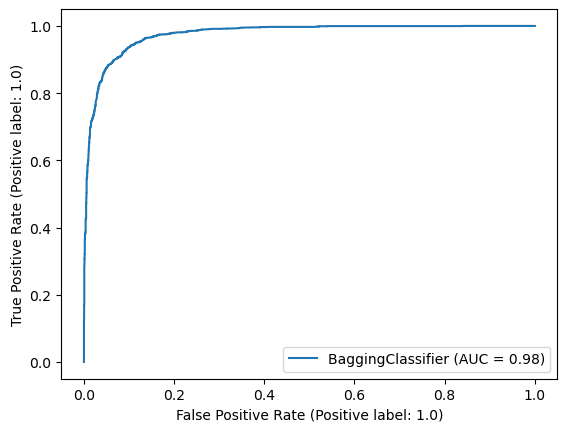

In [212]:
RocCurveDisplay.from_estimator(Bag_clf,train_X, trainy)

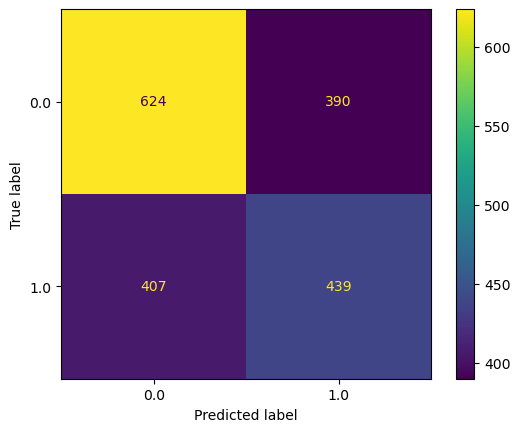

In [213]:
ConfusionMatrixDisplay.from_estimator(Bag_clf, test_X, testY)  
plt.show() 

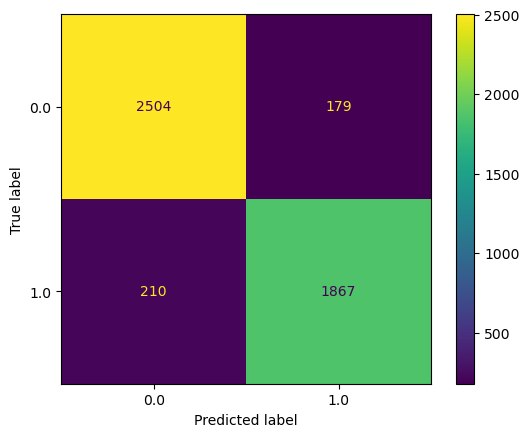

In [214]:
ConfusionMatrixDisplay.from_estimator(Bag_clf, train_X, trainy)  
plt.show() 

In [215]:
bgb_ypred = Bag_clf.predict(test_X)

dtcm = confusion_matrix(testY, bgb_ypred)
print(dtcm)

[[624 390]
 [407 439]]


In [216]:
print("confusion matrix\n",confusion_matrix(testY,bgb_ypred))
print("\nclassification report\n",classification_report(testY,bgb_ypred))
print("Accuracy: ",accuracy_score(testY,bgb_ypred)*100)

confusion matrix
 [[624 390]
 [407 439]]

classification report
               precision    recall  f1-score   support

         0.0       0.61      0.62      0.61      1014
         1.0       0.53      0.52      0.52       846

    accuracy                           0.57      1860
   macro avg       0.57      0.57      0.57      1860
weighted avg       0.57      0.57      0.57      1860

Accuracy:  57.15053763440861
